In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

In [21]:
path = Path(".")
if path.joinpath('../cf-graph-countyfair').is_dir():
    !ln -s ../cf-graph-countyfair/graph.json graph.json

elif not path.joinpath("cf-graph-countyfair").is_dir():
    !git clone https://github.com/regro/cf-graph-countyfair --depth=1
    !ln -s cf-graph-countyfair/graph.json graph.json

try:
    from conda_forge_tick.utils import load_graph
except:
    if not path.joinpath("cf-scripts").is_dir():
        !git clone https://github.com/regro/cf-scripts
        !ln -s cf-scripts/conda_forge_tick  conda_forge_tick

ln: failed to create symbolic link 'graph.json': File exists


In [22]:
cd ../cf-graph-countyfair

/home/cjwright/dev/conda-forge/cf-graph-countyfair


In [43]:
gx = load_graph()

In [44]:
import networkx as nx

In [45]:
gx2 = nx.create_empty_copy(gx)

In [46]:
for node, attrs in gx.nodes('payload'):
    req = attrs.get('requirements', {}).get('run', [])
    gx2.add_edges_from(zip([node]*len(req), req))

In [51]:
gx.nodes['cupy']['payload']['requirements']

{'build': {'c_compiler_stub',
  'cuda_compiler_stub',
  'cxx_compiler_stub',
  'sysroot_linux-64'},
 'host': {'c_compiler_stub',
  'cuda_compiler_stub',
  'cudnn',
  'cutensor',
  'cxx_compiler_stub',
  'cython',
  'fastrlock',
  'linux-sysroot',
  'nccl',
  'pip',
  'python',
  'setuptools'},
 'run': {'c_compiler_stub',
  'cuda_compiler_stub',
  'cxx_compiler_stub',
  'fastrlock',
  'linux-sysroot',
  'numpy',
  'python',
  'setuptools'},
 'test': {'c_compiler_stub',
  'cuda_compiler_stub',
  'cxx_compiler_stub',
  'mock',
  'pytest'}}

In [52]:
z = [(n, gx2.degree[n]) for n in gx2.nodes]

In [67]:
import pandas as pd

In [68]:
pd.DataFrame(sorted(z, key=lambda x: x[1], reverse=True)[:10])

,0,1
0,python,7767
1,c_compiler_stub,3250
2,r-base,2539
3,numpy,2338
4,cxx_compiler_stub,2109
5,scipy,1171
6,six,838
7,gcc-libs,830
8,pandas,823
9,requests,736


In [59]:
import numpy as np

(array([1.2887e+04, 4.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  776.7, 1553.4, 2330.1, 3106.8, 3883.5, 4660.2, 5436.9,
        6213.6, 6990.3, 7767. ]),
 <BarContainer object of 10 artists>)

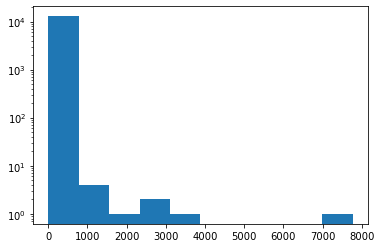

In [65]:
plt.hist([x[1] for x in z], log=True)

In [71]:
gx2.number_of_edges() / gx.number_of_nodes()

4.769054214483577

In [72]:
gx.number_of_edges() / gx.number_of_nodes()

6.993114364859517